# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [2]:
df = pd.read_csv('data/comprar_alquilar.csv')
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [4]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [5]:
df['comprar'].value_counts()

comprar
0    135
1     67
Name: count, dtype: int64

In [6]:
df['estado_civil'].value_counts()

estado_civil
2    73
0    68
1    61
Name: count, dtype: int64

In [7]:
df['trabajo'].value_counts()

trabajo
5    31
8    29
7    27
6    23
3    21
4    19
2    18
1    18
0    16
Name: count, dtype: int64

In [8]:
df.groupby('trabajo')['ingresos'].mean()

trabajo
0    5393.750000
1    4665.666667
2    4533.166667
3    5341.761905
4    5109.368421
5    5139.032258
6    4940.391304
7    4704.148148
8    4849.379310
Name: ingresos, dtype: float64

### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

In [20]:
# Convertir el target a categórico si no lo es
df['comprar'] = df['comprar'].astype('category') 

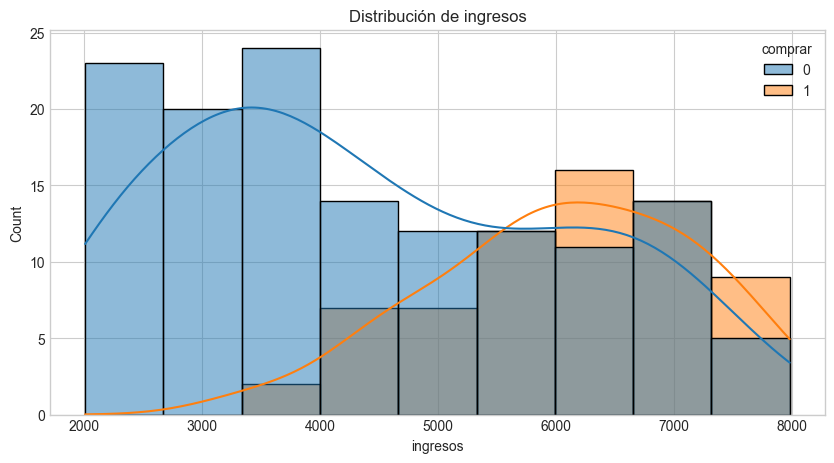

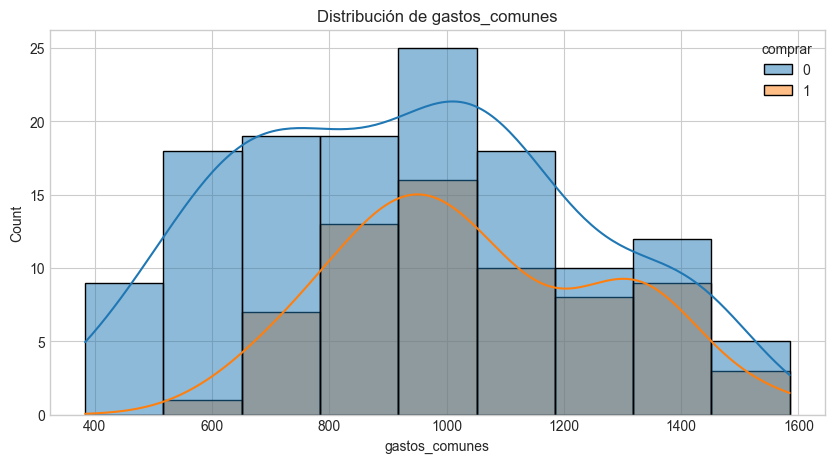

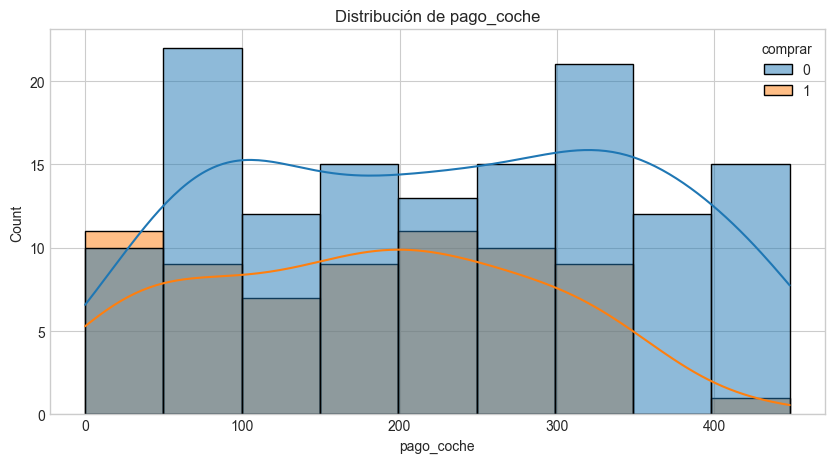

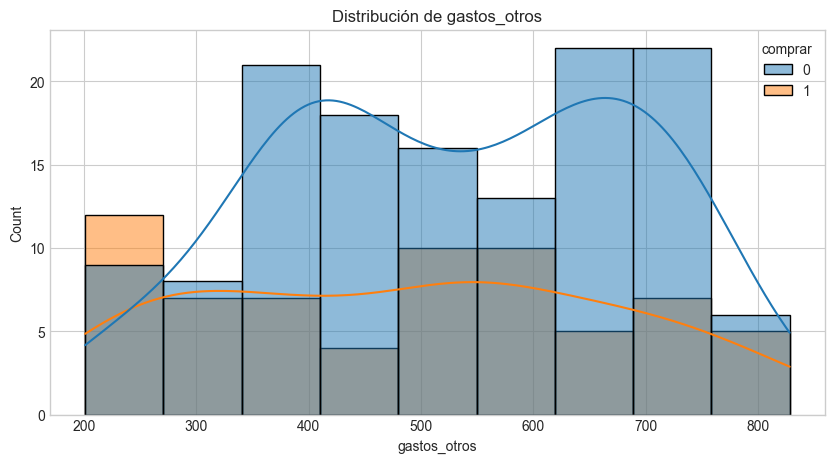

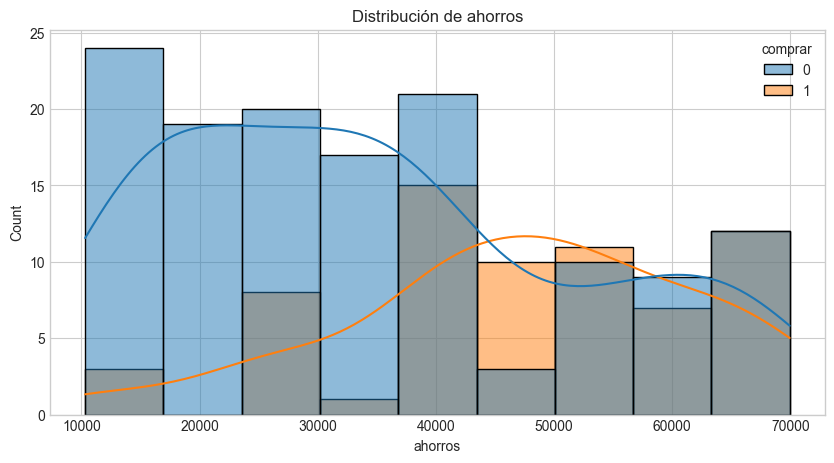

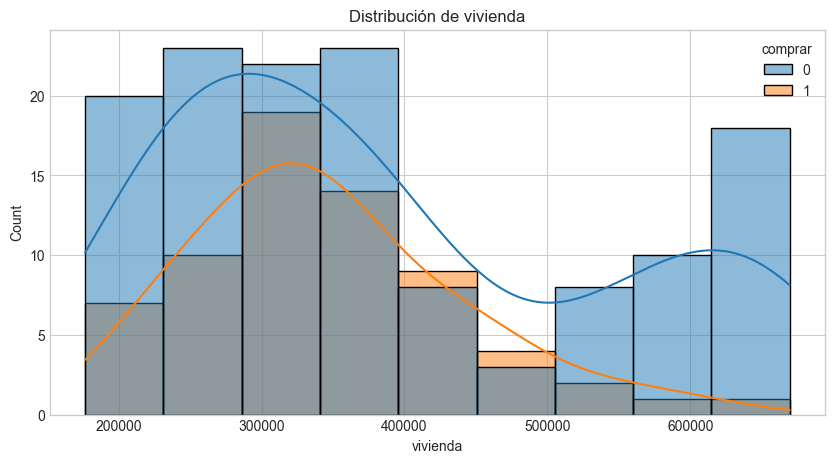

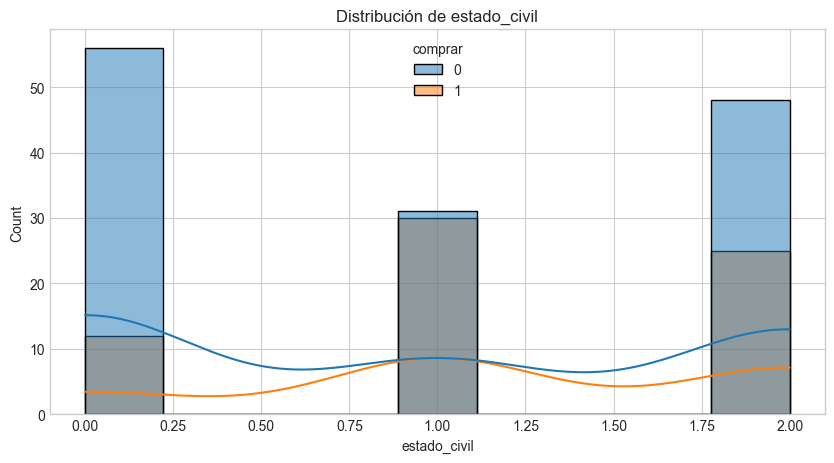

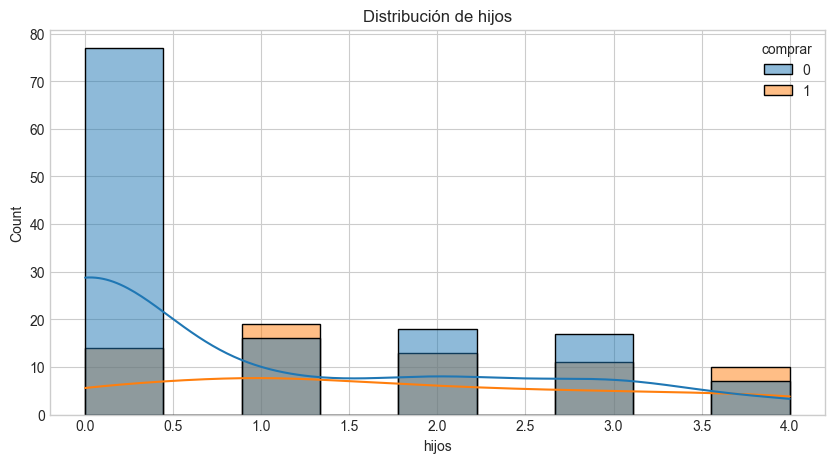

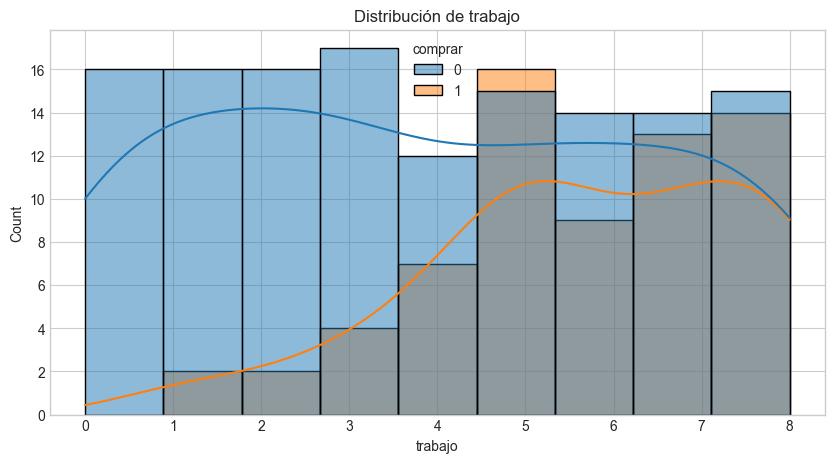

In [21]:
# Análisis univariante
for column in df.columns:
    if column != 'comprar':
        plt.figure(figsize=(10, 5))
        sns.histplot(data=df, x=column, hue='comprar', kde=True)
        plt.title(f'Distribución de {column}')
        plt.show() 

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [25]:
# Separar las características del target
X = df.drop('comprar', axis=1)
y = df['comprar'] 
X

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,6000,1000,0,600,50000,400000,0,2,2
1,6745,944,123,429,43240,636897,1,3,6
2,6455,1033,98,795,57463,321779,2,1,8
3,7098,1278,15,254,54506,660933,0,0,3
4,6167,863,223,520,41512,348932,0,0,3
...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2
198,3961,1030,270,475,21880,280421,2,3,8
199,3184,955,276,684,35565,388025,1,3,8
200,3334,867,369,652,19985,376892,1,2,5


In [26]:
y

0      1
1      0
2      1
3      0
4      1
      ..
197    0
198    0
199    0
200    0
201    0
Name: comprar, Length: 202, dtype: category
Categories (2, int64): [0, 1]

In [24]:
# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
X_scaled 

array([[ 0.62012866,  0.10468863, -1.69895439, ..., -1.22708822,
         0.5623736 , -0.98441983],
       [ 1.0639266 , -0.10162457, -0.71204191, ..., -0.02963981,
         1.29527339,  0.59691461],
       [ 0.89117304,  0.22626604, -0.91263388, ...,  1.1678086 ,
        -0.17052619,  1.38758182],
       ...,
       [-1.05736798, -0.06109876,  0.51558094, ..., -0.02963981,
         1.29527339,  1.38758182],
       [-0.96801269, -0.38530521,  1.26178306, ..., -0.02963981,
         0.5623736 ,  0.201581  ],
       [-0.57842363,  0.68310241, -0.85646812, ..., -1.22708822,
        -0.90342598, -0.19375261]])

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [28]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled) 
X_pca 

array([[ 1.32191526, -0.22295045,  1.59986259, ...,  0.31803061,
        -0.75180934,  0.26998397],
       [ 1.14787775,  1.7169673 ,  0.39572194, ...,  1.54248744,
         0.22179854,  0.43842516],
       [ 0.09036864,  1.83606627,  1.35938166, ..., -1.54049502,
         0.66811958,  0.15346276],
       ...,
       [-1.48146407,  0.9759    ,  0.63757791, ...,  0.66224764,
         0.43775508, -0.79636925],
       [-1.51463264, -0.39217592,  0.00570993, ...,  0.82004012,
         0.05571045, -0.14376766],
       [-0.35346394, -1.72020938, -0.60988792, ...,  0.3963229 ,
         0.73154396,  0.18661762]])

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes? 

In [30]:
# 1. ¿Cuánta varianza explica cada Principal Component? 

varianza_explicada = pca.explained_variance_ratio_ 
varianza_explicada 

array([0.29913557, 0.23294923, 0.11711241, 0.10685622, 0.09635279,
       0.05629866, 0.04145579, 0.03017819, 0.01966115])

In [31]:
# 2. ¿Y de manera acumulada empezando por el PC1? 

# Varianza explicada acumulada
varianza_acumulada = varianza_explicada.cumsum() 
varianza_acumulada 

array([0.29913557, 0.5320848 , 0.64919721, 0.75605343, 0.85240621,
       0.90870487, 0.95016066, 0.98033885, 1.        ])

In [32]:
# Mostrar la varianza explicada y acumulada
varianza_explicada, varianza_acumulada 
varianza_explicada 

array([0.29913557, 0.23294923, 0.11711241, 0.10685622, 0.09635279,
       0.05629866, 0.04145579, 0.03017819, 0.01966115])

In [33]:
# 3. ¿Cuánta varianza explicarían sólo 5 componentes? 
varianza_explicada_5 = varianza_explicada[:5].sum()
varianza_explicada_5 

0.852406211771431

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC 

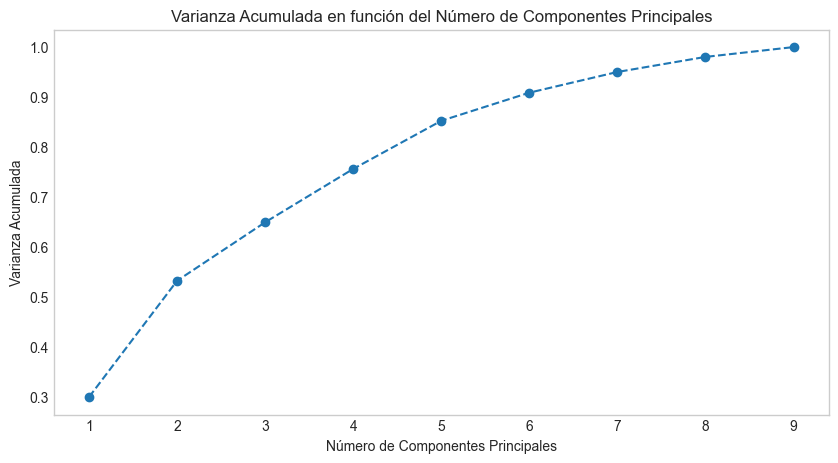

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), varianza_acumulada, marker='o', linestyle='--')
plt.title('Varianza Acumulada en función del Número de Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show() 

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

In [35]:
# Obtener los componentes principales
componentes = pca.components_ 
componentes 

array([[ 4.93720326e-01,  3.18228652e-01, -1.23770585e-01,
        -1.11875722e-01,  4.44650306e-01,  4.62608605e-01,
        -2.52278902e-01, -2.59858682e-01, -2.90247540e-01],
       [ 3.06958523e-01,  1.47372634e-01, -9.16409584e-02,
         1.11593405e-04,  2.88434882e-01,  1.48984886e-01,
         4.69043960e-01,  5.21893872e-01,  5.27155638e-01],
       [-9.14192492e-02, -3.63453156e-01, -5.16144106e-01,
         7.01985912e-01,  1.91767355e-01,  1.40513292e-01,
        -1.72884784e-01,  1.12183561e-01, -3.69101842e-02],
       [ 1.11222044e-01,  8.16296251e-02,  7.80267686e-01,
         5.90704378e-01,  2.28391302e-02,  1.50085403e-01,
        -7.66309571e-03,  7.40404830e-03, -7.49271067e-03],
       [ 8.88965452e-02,  7.63005855e-01, -2.65553621e-01,
         3.30743735e-01, -2.89002223e-01, -3.65555555e-01,
        -1.04638865e-01,  4.36678973e-02,  8.65473020e-06],
       [-7.54772584e-02,  6.79027972e-02, -1.53696523e-01,
         1.54422329e-01, -2.30180519e-01,  2.907985

In [36]:
# Crear un DataFrame para el mapa de calor
df_componentes = pd.DataFrame(componentes, columns=X.columns, index=[f'PC{i+1}' for i in range(9)]) 
df_componentes 

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
PC1,0.493720,0.318229,-0.123771,-0.111876,0.444650,0.462609,-0.252279,-0.259859,-0.290248
PC2,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
PC3,-0.091419,-0.363453,-0.516144,0.701986,0.191767,0.140513,-0.172885,0.112184,-0.036910
PC4,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
PC5,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009
PC6,-0.075477,0.067903,-0.153697,0.154422,-0.230181,0.290799,0.767070,-0.387964,-0.256446
PC7,-0.154319,0.105598,-0.027333,-0.101876,-0.524584,0.641034,-0.212365,0.460067,-0.105053
PC8,-0.012732,0.010274,-0.061759,0.037977,-0.212759,0.260847,-0.204816,-0.532216,0.745630
PC9,0.776990,-0.374440,-0.048557,0.026631,-0.474168,-0.156101,-0.003289,0.011051,-0.060657


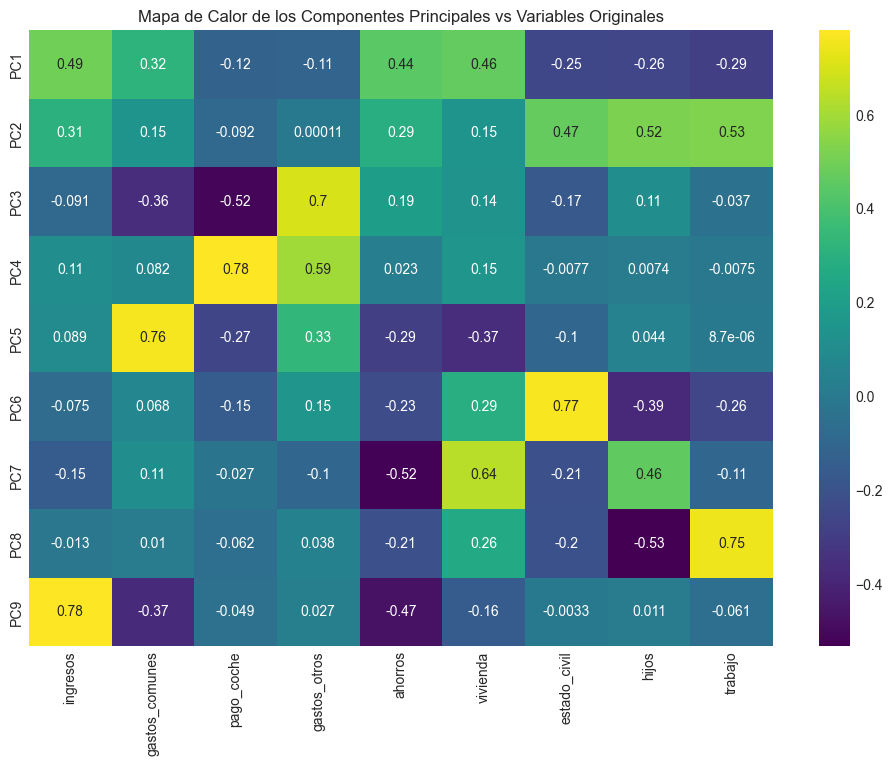

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_componentes, cmap='viridis', annot=True)
plt.title('Mapa de Calor de los Componentes Principales vs Variables Originales')
plt.show() 

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo 

In [39]:
# 1. Divide en train y test 

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train, X_test, y_train, y_test 

(     ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
 199      3184             955         276           684    35565    388025   
 38       6025             964         187           567    63892    302117   
 24       5099             867          73           336    40451    340230   
 122      7138            1356          27           209    64027    427780   
 197      3831             690         352           488    10723    363120   
 ..        ...             ...         ...           ...      ...       ...   
 106      6205            1179         240           729    56904    661009   
 14       7567            1059         341           339    42462    641963   
 92       4426            1328         152           480    11593    245454   
 179      2028             690         167           325    37309    284984   
 102      6332            1266          32           252    55641    665167   
 
      estado_civil  hijos  trabajo  
 199         

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 

In [42]:
# 2. Prepara un pipeline compuesto por:
#   - StandardScaler,
#   - PCA de 5 componentes
#   - Un clasificador 

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', RandomForestClassifier(random_state=42))
]) 

pipeline 

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [43]:
# 3. Entrena 

pipeline.fit(X_train, y_train) 

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [45]:
# 4. Predice con test 

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test) 
y_test_pred 

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [46]:
# 5. Calcula el accuracy score en train y test 

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy 

(1.0, 0.7804878048780488)

In [ ]:
'''EXPLICACIÓN DE LA PREGUNTA 6 
La matriz de confusión es una herramienta útil para evaluar el rendimiento de 
un modelo de clasificación. Representa la cantidad de predicciones correctas e 
incorrectas realizadas por el modelo, organizadas de tal manera que cada fila
 de la matriz representa las instancias reales de una clase y cada columna 
 representa las instancias predichas de una clase. 


La matriz de confusión generada con el pipeline especificado es la siguiente:

                                Prediccion: Alquilar     Prediccion: Comprar

Etiqueta: Alquilar:                       28                     6

Etiqueta: Comprar                          9                    18


Etiqueta: Alquilar
Etiqueta: Comprar
​
 
Análisis de la matriz de confusión:
i.- Verdaderos negativos (TN): 22
  - El modelo predijo correctamente que 28 personas alquilan la vivienda.

ii.- Falsos positivos (FP): 2
   - En 6 casos, el modelo predijo "Comprar" cuando la etiqueta verdadera era "Alquilar".

iii.- Falsos negativos (FN): 7
    - En 9 casos, el modelo predijo "Alquilar" cuando la etiqueta verdadera era "Comprar".

iv.- Verdaderos positivos (TP): 10
   - El modelo predijo correctamente que 18 personas compran la vivienda.


Métricas de rendimiento:
Podemos calcular algunas métricas importantes a partir de la matriz de confusión:

Precisión (Accuracy): (𝑇𝑁 + 𝑇𝑃) / (𝑇𝑁 + 𝐹𝑃 + 𝐹𝑁 + 𝑇𝑃) =  (22 + 10) / (22 + 2 + 7 + 10) = 0.7805

Precisión (Precision) para "Comprar": (𝑇𝑃) / (𝑇𝑃 +𝐹𝑃) = (10) / (10 + 2) ≈ 0.8333

Sensibilidad (Recall) para "Comprar": (𝑇𝑃) / (𝑇𝑃  +𝐹𝑁) = (10) / (10 + 7) = 0.5882 


Conclusión:
El modelo entrenado con el pipeline tiene una precisión general de aproximadamente 78.05%. La precisión para predecir "Comprar" es del 83.33%, y la sensibilidad para "Comprar" es
 del 58.82%. 
'''

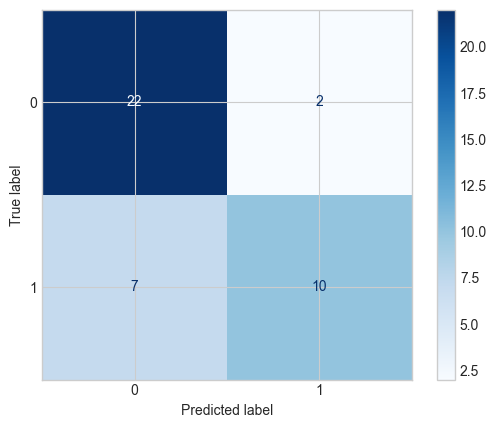

In [47]:
# 6. Representa la matriz de confusión 

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show() 

In [55]:
# PREGUNTA 7 

In [54]:
'''DESARROLLO Y EXPLICACIÓN DEL DESARROLLO DE LA PREGUNTA 7.

Parámetros a explorar
i.- Número de componentes principales (n_components) en PCA:

- Probar diferentes números de componentes: [3, 5, 7, 9]

ii.- Número de estimadores (n_estimators) en RandomForestClassifier:

- Probar diferentes números de árboles en el bosque: [50, 100, 200]

iii.- Profundidad máxima (max_depth) en RandomForestClassifier:

- Probar diferentes profundidades máximas de los árboles: [None, 10, 20]

iv.- Número de características consideradas en cada división (max_features) en RandomForestClassifier:

- Probar diferentes números de características: ['auto', 'sqrt', 'log2']

v.- Criterio para medir la calidad de una división (criterion) en RandomForestClassifier:

- Probar diferentes criterios: ['gini', 'entropy']'''

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir el grid de parámetros
param_grid = {
    'pca__n_components': [3, 5, 7, 9],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Accuracy del mejor modelo
best_train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
best_test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

best_train_accuracy, best_test_accuracy 

c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
242 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rodri\Ap

(1.0, 0.7560975609756098)

In [48]:
# 7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?

param_grid = {
    'pca__n_components': [3, 5, 7],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20]
} 

In [56]:
# 8. Vuelve a iterar de nuevo con un gridsearch 

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train) 

c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
171 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rodri\Ap

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 10, 20],
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__n_estimators': [50, 100, 200],
                         'pca__n_components': [3, 5, 7, 9]})

In [57]:
# 9. Guarda tu mejor modelo 

# Mejor modelo encontrado
best_model = grid_search.best_estimator_ 
best_model 

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [58]:
# Accuracy del mejor modelo
best_train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
best_test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

best_train_accuracy, best_test_accuracy 

(1.0, 0.7560975609756098)

In [59]:
# Guardar el mejor modelo
import joblib
joblib.dump(best_model, 'mejor_modelo.pkl') 

['mejor_modelo.pkl']